In [1]:
import sympy as sym
from sympy.polys import subresultants_qq_zz

sym.init_printing()

In [2]:
assert sym.__version__ == '1.1.1'

In [3]:
import imp
sylvester = imp.load_source('sylvester', '../src/sylvesters.py')

Resultant
----------

If $p$ and $q$ are two polynomials over a commutative ring with identity which can be factored into linear factors,

$$p(x)=a_0(x−r_1)(x−r_2)\dots(x−r_m)$$

$$q(x)=b_0(x−s_1)(x−s_2)\dots(x−s_n)$$

then the resultant $R(p,q)$ of $p$ and $q$ is defined as:

$$R(p,q)=a^n_{0}b^m_{0}\prod_{i=1}^{m}\prod_{j=1}^{n}(r_i−s_j)$$

Since the resultant is a symmetric function of the roots of the polynomials $p$ and $q$, it can be expressed as a polynomial in the coefficients of $p$ and $q$.

From the definition, it is clear that the resultant will equal zero if and only if $p$ and $q$ have at least one common root. Thus, the resultant becomes very usefull in identifying whether common roots exist. 

Sylvester's Resultant
---------------------

It was proven that the determinant of the Sylvester's matrix is equal to the resultant. Assume the two polynomials:

-  $$p(x)=a_0x_m + a_1x_m−1+\dots+a_{m−1}x+a_m$$
-  $$q(x)=b_0x_n + b_1x_{n−1}+\dots+b_{n−1}x+b_n$$

Then the Sylverster matrix in the $(m+n)\times(m+n)$ matrix:

$$\left|\begin{matrix}a_{0}&a_{1}&a_{2}&\ldots&a_{m}&0&\ldots&0\cr 0&a_{0}&a_{1}%
&\ldots&a_{{m-1}}&a_{m}&\ldots&0\cr&&\ddots&.&.&.&.&.\cr 0&0&.&.&.&.&.&a_{m}%
\cr b_{0}&b_{1}&b_{2}&\ldots&b_{n}&0&\ldots&0\cr 0&b_{0}&b_{1}&\ldots&b_{{n-1}%
}&b_{n}&\ldots&0\cr&&\ddots&.&.&.&.&.\cr 0&0&.&.&.&.&.&b_{n}\cr\end{matrix}%
\right| = \Delta $$

Thus $|\Delta|$ is equal to the $R(p, q)$.

Example: Existence of common roots
------------------------------------------

Two examples are consider here. Note that if the system has a common root we are expecting the resultant/determinant to equal to zero.

The Python library [SympPy](http://www.sympy.org/en/index.html) offers an implementation of the Sylverster's matrix. An implementation has also been created for the purpose of [this work](https://github.com/Nikoleta-v3/resultant-theory/blob/packaging/src/sylvesters.py). Both formulations are used to
verify the results.

In [4]:
x = sym.symbols('x')

**A common roots exists.**

In [5]:
f = x ** 2 - 5 * x + 6
g = x ** 2 - 3 * x + 2

In [6]:
f, g

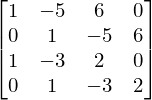

In [10]:
example_one_matrix = sylvester.sylvester_matrix(f, g, x)
example_one_matrix

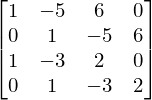

In [8]:
subresultants_qq_zz.sylvester(f, g, x)

In [11]:
example_one_matrix.det()

**A common root does not exist.**

In [12]:
z = x ** 2 - 7 * x + 12
h = x ** 2 - x

In [13]:
z, h

In [14]:
example_two_matrix = sylvester.sylvester_matrix(z, h, x)
example_two_matrix.det()

Example: Two variables
----------

When we have system of two variables we solve for one and the second is kept as a coefficient.Thus we can find the roots of the equations, that is why the resultant is often refeered to as the eliminator.

In [15]:
y = sym.symbols('y')

In [16]:
f = x ** 2 + x * y + 2 * x + y -1
g = x ** 2 + 3 * x - y ** 2 + 2 * y - 1
f, g

In [17]:
example_three_matrix = sylvester.sylvester_matrix(f, g, y)

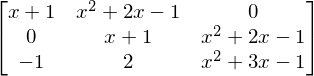

In [20]:
example_three_matrix

In [21]:
example_three_matrix.det().factor()

Three roots for x $\in \{-3, 0, 1\}$.

For $x=-3$ then $y=1$.

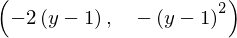

In [22]:
f.subs({x:-3}).factor(), g.subs({x:-3}).factor()

In [23]:
f.subs({x:-3, y:1}), g.subs({x:-3, y:1})

For $x=0$ the $y=1$.

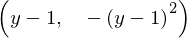

In [24]:
f.subs({x:0}).factor(), g.subs({x:0}).factor()

In [25]:
f.subs({x:0, y:1}), g.subs({x:0, y:1})

For $x=1$ then $y=-1$ is the common root,

In [26]:
f.subs({x:1}).factor(), g.subs({x:1}).factor()

In [27]:
f.subs({x:1, y:-1}), g.subs({x:1, y:-1})

In [28]:
f.subs({x:1, y:3}), g.subs({x:1, y:3})

Example: Generic Case
-----------------

In [29]:
a = sym.IndexedBase("a")
b = sym.IndexedBase("b")

In [30]:
f = a[1] * x + a[0]
g = b[2] * x ** 2 + b[1] * x + b[0]

In [31]:
matrix = sylvester.sylvester_matrix(f, g, x)

In [32]:
matrix.det()